In [1]:
import pandas as pd
import numpy as np                            
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
pylab.rcParams['figure.figsize'] = (10, 6)
iris_data = datasets.load_iris()
X = iris_data.data[:, [2, 3]]
y = iris_data.target
# Input the iris data into the pandas dataframe
iris_dataframe = pd.DataFrame(iris_data.data[:, [2, 3]], columns=iris_data.feature_names[2:])


In [3]:
print(iris_dataframe.head())
# Print the unique labels of the dataset
print('\n' + 'Unique Labels contained in this data are ' + str(np.unique(y)))


   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

Unique Labels contained in this data are [0 1 2]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('The training set contains {} samples and the test set contains {} samples'.format(X_train.shape[0], X_test.shape[0]))


The training set contains 105 samples and the test set contains 45 samples


<ipython-input-5-326de4b2b91a>:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], c=cmap(idx), marker=markers[idx], label=cl)


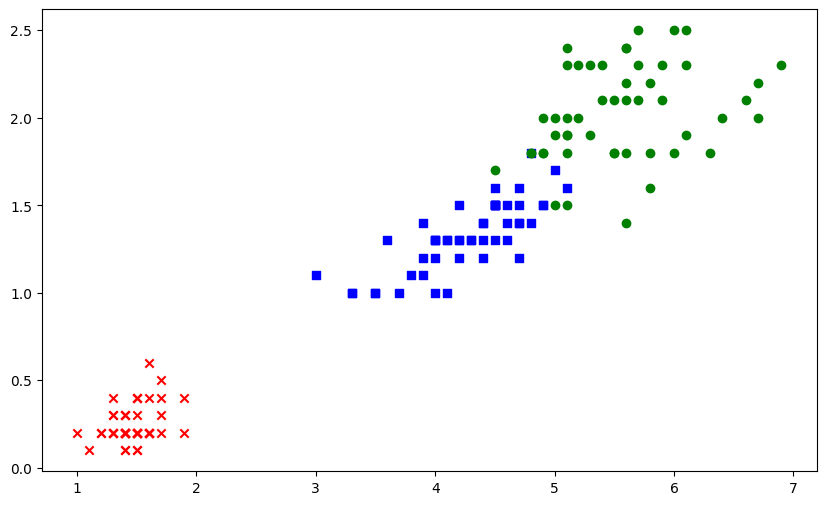

In [5]:
markers = ('x', 's', 'o')
colors = ('red', 'blue', 'green')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], c=cmap(idx), marker=markers[idx], label=cl)


In [6]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train_standard = standard_scaler.transform(X_train)
X_test_standard = standard_scaler.transform(X_test)
print('The first five rows after standardisation look like this:\n')
print(pd.DataFrame(X_train_standard, columns=iris_dataframe.columns).head())


The first five rows after standardisation look like this:

   petal length (cm)  petal width (cm)
0          -0.182950         -0.293181
1           0.930661          0.737246
2           1.042022          1.638870
3           0.652258          0.350836
4           1.097702          0.737246


In [17]:
SVM = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
SVM.fit(X_train_standard, y_train)
print('Accuracy of our SVM model on the training data is {:.2f} out of '.format(SVM.score(X_train_standard, y_train)))
print('Accuracy of our SVM model on the test data is {:.2f} out of 1'.format(SVM.score(X_test_standard, y_test)))#<br><br>



Accuracy of our SVM model on the training data is 0.95 out of 
Accuracy of our SVM model on the test data is 0.98 out of 1


<ipython-input-18-d64cdae904ae>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)


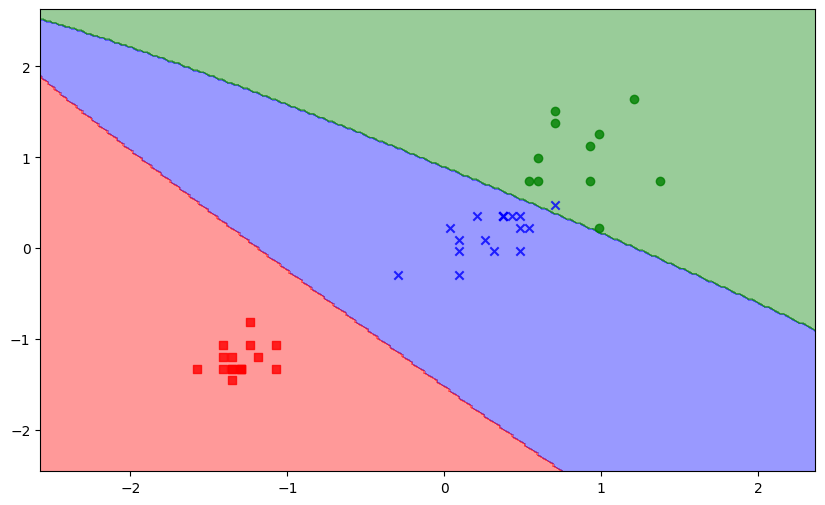

In [18]:
import warnings
def versiontuple(version):
   return tuple(map(int, (version.split("."))))
def decision_plot(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'green', 'gray', 'cyan')

   cmap = ListedColormap(colors[:len(np.unique(y))])
   # plot the decision surface
   x1min, x1max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2min, x2max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, resolution), np.arange(x2min, x2max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
decision_plot(X_test_standard, y_test, SVM)
